In [116]:
# Import Dependencies
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress




In [117]:
# Read CSV File
csv_path = "Resources/Player_Stats.csv"

In [118]:
# Create a DataFrame
# GP = Games Played
# GS = Games Scored
# MIN = Minutes
# ASST = Assist
# G  = Goal
# SOG = Shots on Goal


player_stats_df = pd.read_csv(csv_path)
player_stats_df.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


In [119]:
# Counting the number of Players
player_stats_count = len(player_stats_df["PLAYER"].unique())
player_stats_count

540

In [120]:
# Finding the players that have the most goals
player_stats_df = player_stats_df.sort_values("G", ascending=False)
player_stats_df.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


In [121]:
# Finding the 20 players who played the most games
player_stats_df = player_stats_df.sort_values("GP", ascending=False)
player_stats_df.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
223,224,Harry Maguire,Manchester United,38,38,3420,1,1,25,8
154,155,James Tarkowski,Burnley,38,38,3420,2,2,15,5
373,374,Ben Foster,Watford,38,38,3420,0,0,1,1
153,154,Dwight McNeil,Burnley,38,38,3344,2,6,32,14
279,280,Jordan Pickford,Everton,38,38,3420,0,0,0,0


In [122]:
# Creating a new data frame with the top 50 ranked players
top_players = player_stats_df[player_stats_df["Rank"] <= 50]
top_players.head()



,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
25,26,Roberto Firmino Barbosa de Oliveira,Liverpool,38,34,3001,9,8,70,39
7,8,Raúl Alonso Jiménez Rodríguez,Wolverhampton Wanderers,38,37,3244,17,6,89,44
39,40,Mason Mount,Chelsea,37,32,2872,7,5,50,29
40,41,Todd Cantwell,Norwich City,37,30,2500,6,2,29,16


In [123]:
st.ttest_1samp(top_players["G"], player_stats_df["G"].mean())

TtestResult(statistic=13.191676278304028, pvalue=9.582897372644606e-18, df=49)

In [124]:
st.ttest_1samp(top_players["ASST"], player_stats_df["ASST"].mean())

TtestResult(statistic=5.616779470676146, pvalue=9.062009171815112e-07, df=49)

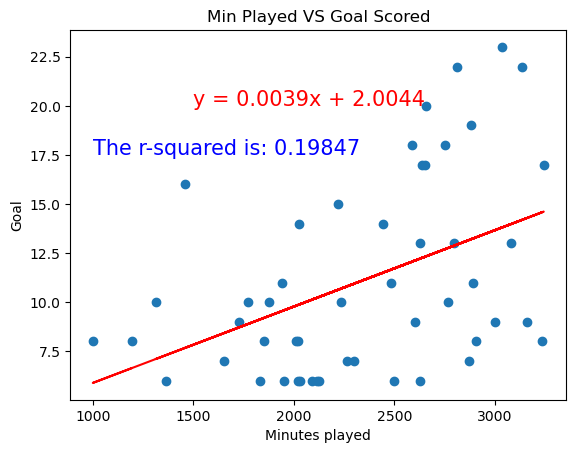

In [125]:
#Comparing "Minutes Played" vs "Goals Scored" with a scatter plot.
plt.scatter(top_players["MIN"],top_players["G"])
plt.xlabel("Minutes played")
plt.ylabel("Goal")
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_players["MIN"], top_players["G"])
regress_values = top_players["MIN"] * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(top_players["MIN"],regress_values,"r-")
plt.annotate(line_eq,(1500,20),fontsize=15,color="red")
plt.annotate(f"The r-squared is: {round(rvalue**2,5)}",(1000,17.5),fontsize=15,color="blue")
plt.title("Min Played VS Goal Scored")
plt.savefig("Images/lineConfig.png")
plt.show()

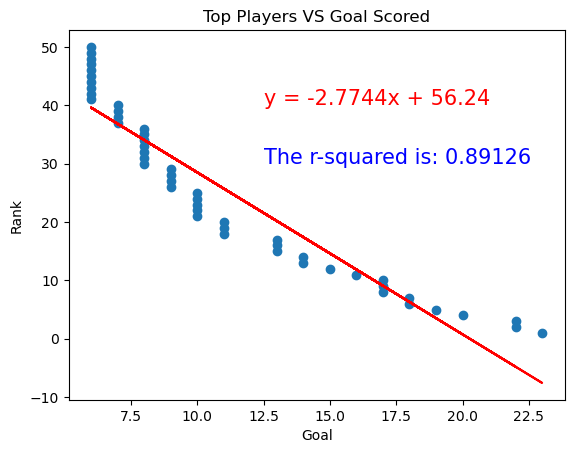

In [126]:
#Comparing "Player Rank" vs "Goals Scored" with a scatter plot
plt.scatter(top_players["G"],top_players["Rank"])
plt.xlabel("Goal")
plt.ylabel("Rank")
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_players["G"], top_players["Rank"])
regress_values = top_players["G"] * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(top_players["G"],regress_values,"r-")
plt.annotate(line_eq,(12.5,40),fontsize=15,color="red")
plt.annotate(f"The r-squared is: {round(rvalue**2,5)}",(12.5,30),fontsize=15,color="blue")
plt.title("Top Players VS Goal Scored")
plt.savefig("Images/lineConfig2.png")
plt.show()

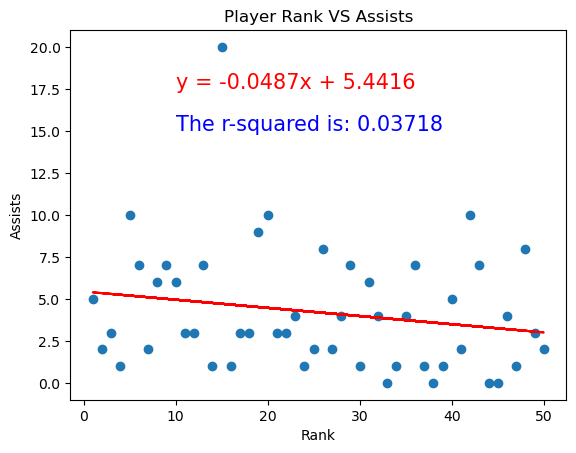

In [127]:
# # Comparing "Player Rank" vs "Assists" with a scatter plot.


plt.scatter(top_players["Rank"],top_players["ASST"])
plt.xlabel("Rank")
plt.ylabel("Assists")
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_players["Rank"], top_players["ASST"])
regress_values = top_players["Rank"] * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(top_players["Rank"],regress_values,"r-")
plt.annotate(line_eq,(10,17.5),fontsize=15,color="red")
plt.annotate(f"The r-squared is: {round(rvalue**2,5)}",(10,15),fontsize=15,color="blue")
plt.title("Player Rank VS Assists")
plt.savefig("Images/lineConfig3.png")
plt.show()

In [128]:
# Finding Goal% and adding column to the main Player Stat data frame 
player_stats_df["GOAL%"] = player_stats_df["G"]/player_stats_df["SHOTS"]*100
player_stats_df.head()


,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,GOAL%
223,224,Harry Maguire,Manchester United,38,38,3420,1,1,25,8,4.000000
154,155,James Tarkowski,Burnley,38,38,3420,2,2,15,5,13.333333
373,374,Ben Foster,Watford,38,38,3420,0,0,1,1,0.000000
153,154,Dwight McNeil,Burnley,38,38,3344,2,6,32,14,6.250000
279,280,Jordan Pickford,Everton,38,38,3420,0,0,0,0,NaN


In [129]:
# Removing NANS from data frame
player_stats_df.fillna(0,inplace=True)
player_stats_df

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,GOAL%
223,224,Harry Maguire,Manchester United,38,38,3420,1,1,25,8,4.000000
154,155,James Tarkowski,Burnley,38,38,3420,2,2,15,5,13.333333
373,374,Ben Foster,Watford,38,38,3420,0,0,1,1,0.000000
153,154,Dwight McNeil,Burnley,38,38,3344,2,6,32,14,6.250000
279,280,Jordan Pickford,Everton,38,38,3420,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
536,537,Darnell Johnson,Leicester City,0,0,0,0,0,0,0,0.000000
538,539,Conor Coventry,West Ham United,0,0,0,0,0,0,0,0.000000
533,534,Leonardo Campana,Wolverhampton Wanderers,0,0,0,0,0,0,0,0.000000
524,525,Matt Macey,Arsenal,0,0,0,0,0,0,0,0.000000


In [130]:
# Finding Shot Accuracy % and adding column to the data frame
player_stats_df["Shot Accuracy%"] = player_stats_df["SOG"]/player_stats_df["SHOTS"]*100
player_stats_df.head(10)


,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,GOAL%,Shot Accuracy%
223,224,Harry Maguire,Manchester United,38,38,3420,1,1,25,8,4.000000,32.000000
154,155,James Tarkowski,Burnley,38,38,3420,2,2,15,5,13.333333,33.333333
373,374,Ben Foster,Watford,38,38,3420,0,0,1,1,0.000000,100.000000
153,154,Dwight McNeil,Burnley,38,38,3344,2,6,32,14,6.250000,43.750000
279,280,Jordan Pickford,Everton,38,38,3420,0,0,0,0,0.000000,NaN
142,143,Rúben Diogo da Silva Neves,Wolverhampton Wanderers,38,35,3059,2,2,38,10,5.263158,26.315789
147,148,Joelinton Cássio Apolinário de Lira,Newcastle United,38,32,2699,2,2,38,15,5.263158,39.473684
346,347,Martin Dúbravka,Newcastle United,38,38,3420,0,0,0,0,0.000000,NaN
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,33.333333,57.575758
341,342,Kasper Schmeichel,Leicester City,38,38,3420,0,0,1,0,0.000000,0.000000


In [131]:
# Grouping by Teams and finding mean for Goal%, mean for Shot Accuracy, and total goals scored
team_goals = player_stats_df["GOAL%"].groupby(player_stats_df["TEAM"]).mean()
team_sog = player_stats_df["Shot Accuracy%"].groupby(player_stats_df["TEAM"]).mean()
team_total_goals = player_stats_df["G"].groupby(player_stats_df["TEAM"]).sum()

In [132]:
# Create DataFrame for Goal % and SOG%
team_goals_df = pd.DataFrame(team_goals)
team_goals_df["SOG%"]= team_sog
team_goals_df["Total Goals"] = team_total_goals
team_goals_df.head()

,GOAL%,SOG%,Total Goals
TEAM,,,
Arsenal,10.161982,43.431215,56
Aston Villa,7.619561,34.866026,40
Bournemouth,8.154427,41.293437,37
Brighton and Hove Albion,6.162119,37.090661,32
Burnley,5.310104,32.540584,39


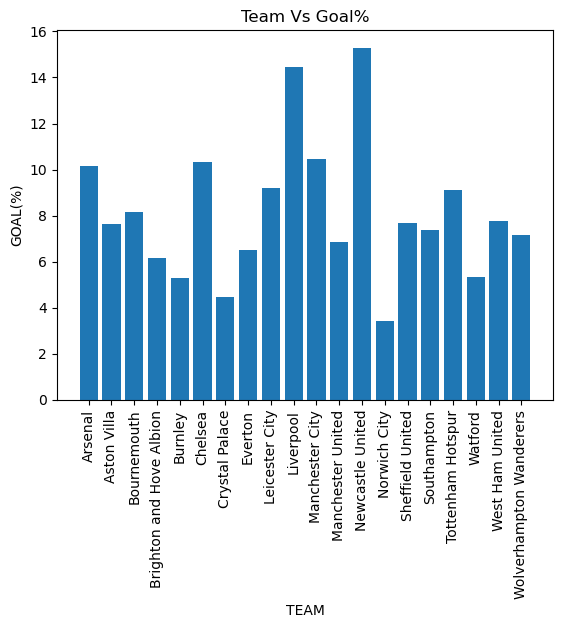

In [133]:
# Create a bar graph 

#team_goals_df.plot(kind="bar")
plt.bar(team_goals_df.index.values,team_goals_df["GOAL%"])
plt.xticks(rotation=90)
plt.xlabel("TEAM")
plt.ylabel("GOAL(%)")
plt.title("Team Vs Goal%")
plt.savefig("Images/barchart1.png")
plt.show()


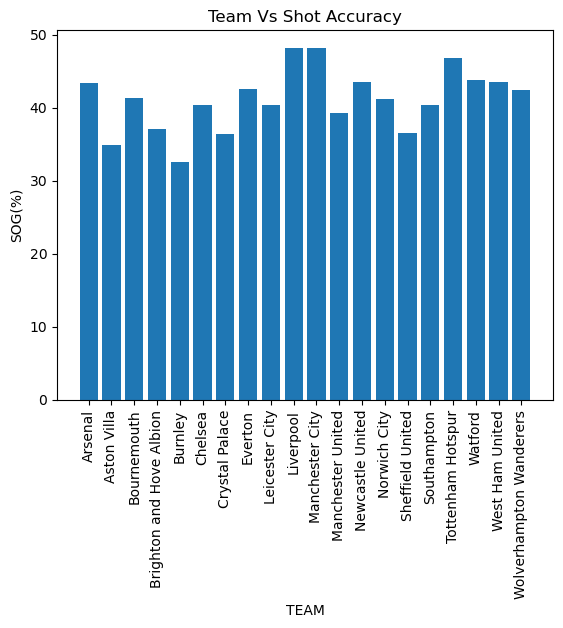

In [134]:
# Crate a bar graph for SOG%
plt.bar(team_goals_df.index.values,team_goals_df["SOG%"])
plt.xticks(rotation=90)
plt.xlabel("TEAM")
plt.ylabel("SOG(%)")
plt.title("Team Vs Shot Accuracy")
plt.savefig("Images/barchart2.png")
plt.show()

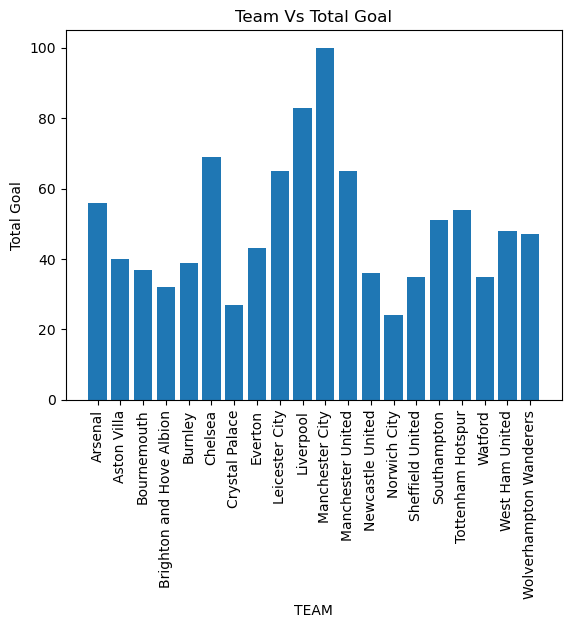

In [135]:
plt.bar(team_goals_df.index.values,team_goals_df["Total Goals"])
plt.xticks(rotation=90)
plt.xlabel("TEAM")
plt.ylabel("Total Goal")
plt.title("Team Vs Total Goal")
plt.savefig("Images/barchart3.png")
plt.show()
